<a href="https://colab.research.google.com/github/heytanay/harry-potter-text-gen/blob/master/HPTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Upload the text
files.upload()

Saving Harry Potter 3 Prisoner of Azkaban (DL).txt to Harry Potter 3 Prisoner of Azkaban (DL).txt


{'Harry Potter 3 Prisoner of Azkaban (DL).txt': b'Harry Potter and the Prisoner of Azkaban\n\nby J.K. Rowling\n\nCHAPTER ONE\n\nOWL POST\n\nHarry Potter was a highly unusual boy in many ways. For one thing, he\nhated the summer holidays more than any other time of year. For another,\nhe really wanted to do his homework but was forced to do it in secret,\nin the dead of night. And he also happened to be a wizard.\n\nIt was nearly midnight, and he was lying on his stomach in bed, the\nblankets drawn right over his head like a tent, a flashlight in one hand\nand a large leather-bound book (A History of Magic by Bathilda Bagshot)\npropped open against the pillow. Harry moved the tip of his\neagle-feather quill down the page, frowning as he looked for something\nthat would help him write his essay, "Witch Burning in the Fourteenth\nCentury Was Completely Pointless discuss."\n\nThe quill paused at the top of a likely-looking paragraph. Harry Pushed\nhis round glasses up the bridge of his nos

In [0]:
data = open('Harry Potter 3 Prisoner of Azkaban (DL).txt').read()

In [5]:
# print(data)

Harry Potter and the Prisoner of Azkaban

by J.K. Rowling

CHAPTER ONE

OWL POST

Harry Potter was a highly unusual boy in many ways. For one thing, he
hated the summer holidays more than any other time of year. For another,
he really wanted to do his homework but was forced to do it in secret,
in the dead of night. And he also happened to be a wizard.

It was nearly midnight, and he was lying on his stomach in bed, the
blankets drawn right over his head like a tent, a flashlight in one hand
and a large leather-bound book (A History of Magic by Bathilda Bagshot)
propped open against the pillow. Harry moved the tip of his
eagle-feather quill down the page, frowning as he looked for something
that would help him write his essay, "Witch Burning in the Fourteenth
Century Was Completely Pointless discuss."

The quill paused at the top of a likely-looking paragraph. Harry Pushed
his round glasses up the bridge of his nose, moved his flashlight closer
to the book, and read:

Non-magic people 

In [6]:
# Split the Data based on the two present new line characters after each line break. Most documents have a single new line character, but this one has 2.
# Also, drop first few elements like title and author name and chapter number as much as possible
corpus = data.lower().split('\n\n')
corpus = data.lower().split('\n')
del corpus[0:4]
print(corpus)

['chapter one', '', 'owl post', '', 'harry potter was a highly unusual boy in many ways. for one thing, he', 'hated the summer holidays more than any other time of year. for another,', 'he really wanted to do his homework but was forced to do it in secret,', 'in the dead of night. and he also happened to be a wizard.', '', 'it was nearly midnight, and he was lying on his stomach in bed, the', 'blankets drawn right over his head like a tent, a flashlight in one hand', 'and a large leather-bound book (a history of magic by bathilda bagshot)', 'propped open against the pillow. harry moved the tip of his', 'eagle-feather quill down the page, frowning as he looked for something', 'that would help him write his essay, "witch burning in the fourteenth', 'century was completely pointless discuss."', '', 'the quill paused at the top of a likely-looking paragraph. harry pushed', 'his round glasses up the bridge of his nose, moved his flashlight closer', 'to the book, and read:', '', 'non-magic p

In [7]:
corpus = corpus[0:2000]
print(corpus)

['chapter one', '', 'owl post', '', 'harry potter was a highly unusual boy in many ways. for one thing, he', 'hated the summer holidays more than any other time of year. for another,', 'he really wanted to do his homework but was forced to do it in secret,', 'in the dead of night. and he also happened to be a wizard.', '', 'it was nearly midnight, and he was lying on his stomach in bed, the', 'blankets drawn right over his head like a tent, a flashlight in one hand', 'and a large leather-bound book (a history of magic by bathilda bagshot)', 'propped open against the pillow. harry moved the tip of his', 'eagle-feather quill down the page, frowning as he looked for something', 'that would help him write his essay, "witch burning in the fourteenth', 'century was completely pointless discuss."', '', 'the quill paused at the top of a likely-looking paragraph. harry pushed', 'his round glasses up the bridge of his nose, moved his flashlight closer', 'to the book, and read:', '', 'non-magic p

In [0]:
# Start doing NLP stuff
tokenizer = Tokenizer()

# Fit on our corpus
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequence using list of tokens
input_sequence = list()

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequence.append(n_gram_sequence)
    

# Pad sequences
max_seq_len = max([len(x) for x in input_sequence])
input_sequence = np.array(pad_sequences(input_sequence, maxlen=max_seq_len, padding='pre'))

# Create Predictors and label
predictors, label = input_sequence[:, :-1], input_sequence[:, -1]

label = ku.to_categorical(label, num_classes=total_words)

In [9]:
# Let's build the model

model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

W0720 03:58:12.895552 140660724393856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0720 03:58:12.928647 140660724393856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0720 03:58:12.936566 140660724393856 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 17, 100)           295400    
_________________________________________________________________
bidirectional (Bidirectional (None, 17, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 17, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1477)              149177    
_________________________________________________________________
dense_1 (Dense)              (None, 2954)              4366012   
Total params: 5,272,189
Trainable params: 5,272,189
Non-trainable params: 0
______________________________________________

In [10]:
history = model.fit(predictors, label, epochs=100, verbose=1)

W0720 03:58:16.542178 140660724393856 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
13798/13798 [==============================] - 54s 4ms/sample - loss: 6.7882 - acc: 0.0470
Epoch 2/100
13798/13798 [==============================] - 52s 4ms/sample - loss: 6.2959 - acc: 0.0499
Epoch 3/100
13798/13798 [==============================] - 52s 4ms/sample - loss: 6.1299 - acc: 0.0511
Epoch 4/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 6.0388 - acc: 0.0527
Epoch 5/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 5.9498 - acc: 0.0596
Epoch 6/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 5.8582 - acc: 0.0684
Epoch 7/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 5.7481 - acc: 0.0779
Epoch 8/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 5.6479 - acc: 0.0853
Epoch 9/100
13798/13798 [==============================] - 51s 4ms/sample - loss: 5.5590 - acc: 0.0894
Epoch 10/100
13798/13798 [==============================] - 51s 4ms/sampl

In [11]:
# Now first save the model
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku

model.save('nhtpg.h5')
from google.colab import files
files.download('nhtpg.h5')

MessageError: ignored

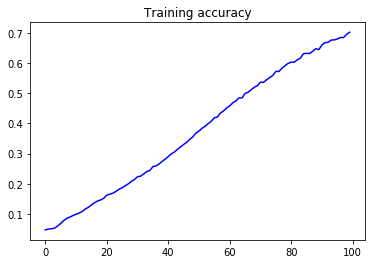

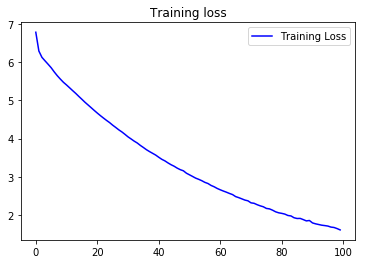

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Harry potter is a"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Harry potter is a sudden blinding light servicing 'e did petunia in a large photograph of gold all him you don't want to be seized uncle vernon brought his life rest youngest look first last better went on only rest crowd rest rest international start muggle paper international muggle paper sleep paper rest rest rest rest rest rest youngest tail first rest books rest rest rest rest rest rest final tail rest rest rest rest rest rest youngest delighted first first invisibility rest rest rest rest rest rest rest rest rest rest rest rest rest return return archway make archway rest final look first
